In [1]:
import nltk
from nltk.corpus import stopwords           # list of stopwords
from nltk.corpus import twitter_samples     # test dataset of 10000 twitter samples
from nltk.stem import PorterStemmer         # module for stemming
from nltk.tokenize import  word_tokenize, RegexpTokenizer   # module for tokenizing strings
import matplotlib.pyplot as plt
import seaborn as sns
import re                                  # library for regular expression operations
import string                              # for string operations

python -m nltk.downloader stopwords

In [2]:
# stopwords.words("english")
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

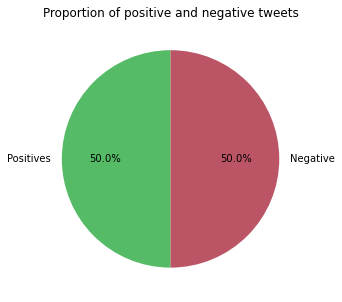

In [3]:
fig = plt.figure(figsize=(5, 5))

labels = 'Positives', 'Negative'
colors = '#55BB66', '#BB5566'

sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proportion of positive and negative tweets")
plt.show()

Removing special characters

In [4]:


s = all_positive_tweets[0]
s

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

In [5]:
def remove_punctuation(sentence, p=None):
    '''Removes digits from a single sentence or a list of strings if words are in stop_words'''
    punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    if p:
        punctuations = p
    if isinstance(sentence, str):
        return sentence.translate(str.maketrans('', '', punctuations))
    if isinstance(sentence, list):
        sentence = [word for word in sentence if word not in punctuations]
    return sentence

def remove_digits(sentence):
    '''Removes digits from a single sentence or a list of strings'''
    if isinstance(sentence, str):
        return re.sub(r'[0-9]', '', sentence)
    if isinstance(sentence, list):
        return [re.sub(r'[0-9]', '', word) for word in sentence]

def remove_emojis(sentence):
    '''Removes emojis from a single sentence'''
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', sentence)

def remove_stop_words(sentence, stop_words):
    '''Removes stopwords from a list of strings sentence if words are in stop_words'''
    sentence = [word for word in sentence if word not in stop_words]
    return sentence

def preprocess(sentence):
    '''
    Preprocess a single sentence by applying:
    - lover case words
    remove digits
    
    '''
    # input to string
    sentence=str(sentence)
    # lowercase all words
    sentence = sentence.lower()
    # remove digits
    sentence = remove_digits(sentence)
    # filter punctuation
    sentence = remove_punctuation(sentence)
    # remove emojis
    sentence = remove_emojis(sentence)
    return sentence


s = "Hello, my name is Simon234. /*😊"
print(s)

# preprocess sencence
s = preprocess(s)
print(s)

# tokenize sentence
s = word_tokenize(s)
print(s)

# remove stopwords
english_stopwords = stopwords.words("english")
s = remove_stop_words(s, english_stopwords)
print(s)




Hello, my name is Simon234. /*😊
hello my name is simon 
['hello', 'my', 'name', 'is', 'simon']
['hello', 'name', 'simon']
